# EDA Analysis on Health Insurance data

Our primary objective in this project is competitor analysis, focusing on a dataset belonging to a rival insurance company. We aim to examine customer diversity based on age, overall health condition, and gender within this dataset. Our goal is to identify potential customer segments and analyze the purchasing behavior of each segment. Additionally, we seek to determine the dataset's capability in addressing various questions and explore how we can refine our strategies based on the insights gleaned from this analysis.

# Reading Data

In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
path = "../insurance.csv"
data = pd.read_csv(path)
data["age"] = data["age"].astype("Int64")
data.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [3]:
data.drop_duplicates(inplace=True)

data is clean and there is no null/nan values

Duplicated values are removed.

------------------------



# Data preparation

## Age segmentation
To gain deeper insights into customer behavior based on age, it's imperative to implement age segmentation.

In [4]:
bins = [18, 30, 40, 50, 60, 70, 80, 90]  # Define your age intervals here
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', "81-90"]  # Labels for the intervals

# Create a new column with age intervals
data['age_range'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
data.head(10)

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,18-30
1,18,male,33.770,1,no,southeast,1725.55230,18-30
2,28,male,33.000,3,no,southeast,4449.46200,18-30
3,33,male,22.705,0,no,northwest,21984.47061,31-40
4,32,male,28.880,0,no,northwest,3866.85520,31-40
5,31,female,25.740,0,no,southeast,3756.62160,31-40
6,46,female,33.440,1,no,southeast,8240.58960,41-50
7,37,female,27.740,3,no,northwest,7281.50560,31-40
8,37,male,29.830,2,no,northeast,6406.41070,31-40
9,60,female,25.840,0,no,northwest,28923.13692,61-70


## BMI segmentation

To enhance our comprehension of customer behavior based on BMI (Body Mass Index), we should implement BMI segmentation.

The range for a healthy BMI is from **18.5** to **24.9**.

The function `bmi_condition` will impact a row and yield three potential outcomes (underweight, overweight, healthy) based on the BMI value of that row.

In [5]:
def bmi_condition(row):

    if row['bmi'] < 18.5:
        return "under_weight"
    elif row['bmi'] > 24.9:
        return "over_weight"
    else:
        return "healthy"

In [6]:
data["bmi_condition"] = data.apply(bmi_condition, axis=1)

In [7]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_condition
0,19,female,27.90,0,yes,southwest,16884.9240,18-30,over_weight
1,18,male,33.77,1,no,southeast,1725.5523,18-30,over_weight
2,28,male,33.00,3,no,southeast,4449.4620,18-30,over_weight


Now that our dataset is segmented, we can conduct a more insightful analysis.

For enhanced understanding, I'll segregate the data based on gender into two dataframes: `female_data` and `male_data`.

 I'll utilize these separate dataframes for certain analyses.

------------------------------

# Data segmentation

In [66]:
segmented_data = data.groupby(by=["sex", "smoker", "bmi_condition", "children"], as_index=False).agg(charges_count=('charges', 'count'),
                                                                                                      charges_avg=('charges', 'mean'))
segmented_data = segmented_data.sort_values(by=["charges_avg", "charges_count"], ascending=False).reset_index()
segmented_data["revenue"] = segmented_data["charges_count"] * segmented_data["charges_avg"]
segmented_data["rev_per_costumer"] = segmented_data["revenue"] * segmented_data["charges_count"] # KPI 
segmented_data = segmented_data.sort_values(by="rev_per_costumer", ascending=False)
segmented_data.head(12)

,index,sex,smoker,bmi_condition,children,charges_count,charges_avg,revenue,rev_per_costumer
38,5,female,no,over_weight,0,195,7728.144666,1.506988e+06,2.938627e+08
36,30,male,no,over_weight,0,180,7892.383349,1.420629e+06,2.557132e+08
29,6,female,no,over_weight,1,109,8761.713400,9.550268e+05,1.040979e+08
34,31,male,no,over_weight,1,110,7924.412547,8.716854e+05,9.588539e+07
4,43,male,yes,over_weight,0,51,34356.377681,1.752175e+06,8.936094e+07
23,7,female,no,over_weight,2,79,10341.478413,8.169768e+05,6.454117e+07
5,18,female,yes,over_weight,0,41,34139.822789,1.399733e+06,5.738904e+07
26,32,male,no,over_weight,2,72,9283.379826,6.684033e+05,4.812504e+07
6,44,male,yes,over_weight,1,34,33681.703812,1.145178e+06,3.893605e+07
22,8,female,no,over_weight,3,52,10547.546353,5.484724e+05,2.852057e+07


In [71]:
data

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_condition
0,19,female,27.900,0,yes,southwest,16884.92400,18-30,over_weight
1,18,male,33.770,1,no,southeast,1725.55230,18-30,over_weight
2,28,male,33.000,3,no,southeast,4449.46200,18-30,over_weight
3,33,male,22.705,0,no,northwest,21984.47061,31-40,healthy
4,32,male,28.880,0,no,northwest,3866.85520,31-40,over_weight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,51-60,over_weight
1334,18,female,31.920,0,no,northeast,2205.98080,18-30,over_weight
1335,18,female,36.850,0,no,southeast,1629.83350,18-30,over_weight
1336,21,female,25.800,0,no,southwest,2007.94500,18-30,over_weight


-------------------------------------------------------

## Data separation  based on Gender

In [9]:
female_data = data.loc[data["sex"] == "female"]
female_data.head(3)

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_condition
0,19,female,27.90,0,yes,southwest,16884.9240,18-30,over_weight
5,31,female,25.74,0,no,southeast,3756.6216,31-40,over_weight
6,46,female,33.44,1,no,southeast,8240.5896,41-50,over_weight


In [10]:
male_data = data.loc[data["sex"] == "male"]
male_data.head(3)

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_condition
1,18,male,33.770,1,no,southeast,1725.55230,18-30,over_weight
2,28,male,33.000,3,no,southeast,4449.46200,18-30,over_weight
3,33,male,22.705,0,no,northwest,21984.47061,31-40,healthy


---------------------

# Value purchased By Gender

In [11]:
gender_value = data.groupby(by="sex", as_index=True).agg({"charges":"sum"})
gender_count = data.groupby(by="sex", as_index=True).agg({"age":"count"})
gender_average = data.groupby(by="sex", as_index=True).agg({"charges":"mean"})
gender_average.columns = ["average of purchased"]
gender_count.columns = ["number of customers"]


gender_base = pd.concat([gender_value, gender_count, gender_average], axis=1)
gender_base


,charges,number of customers,average of purchased
sex,,,
female,8.321061e+06,662,12569.578844
male,9.433124e+06,675,13974.998864


There exists a notable discrepancy between the payment values of male and female customers.

In [12]:
fig = px.bar(gender_base,
             x=gender_base.index,
             y=["charges", "number of customers", "average of purchased"],
             facet_row="variable",
             height=800,
             width=1000,
             )

fig.update_yaxes(type="log", row=3, col=1)
fig.update_yaxes(title="Total revenue", row=2, col=1)
fig.update_yaxes(title="Number of customers", row=1, col=1)
fig.update_yaxes(title="Average of Revenue", row=3, col=1)

fig.update_xaxes(title_font=dict(size=22))  # Change x-axis label font size for all subplots
fig.update_yaxes(title_font=dict(size=22))  # Change y-axis label font size for all subplots

fig.update_layout(
    title_font=dict(size=24),  # Change title font size
)

fig.show()


The number of male and female customers is relatively balanced, with no significant difference between them. However, the total value of purchases made by male clients significantly exceeds that of female clients. Let's analyze the total purchase value for each gender.

In [13]:
fig = px.box(data, x="sex", y="charges", points="all", width=1200, height=800)
fig.update_traces(quartilemethod="exclusive") 


fig.update_xaxes(title_font=dict(size=22))  # Change x-axis label font size for all subplots
fig.update_yaxes(title_font=dict(size=22))  # Change y-axis label font size for all subplots

fig.update_layout(
    title_font=dict(size=24),  # Change title font size
)

In [14]:
value_gender = data.groupby(by="sex").agg({"charges":"sum"})
value_gender

,charges
sex,
female,8.321061e+06
male,9.433124e+06


While the median of the purchase value for women is higher, the total purchased value by men surpasses that of female customers. Additionally, the third interquartile and upper bound of purchase values for males substantially exceed those of females.

# Value purchased by Gender and smoking behavior

In [15]:
smoking_gender = data.groupby(by=["sex", "smoker"], as_index=False).agg(count=("sex", "count"), total_revenue = ("charges", "sum"))
smoking_gender

,sex,smoker,count,total_revenue
0,female,no,547,4.792977e+06
1,female,yes,115,3.528085e+06
2,male,no,516,4.179445e+06
3,male,yes,159,5.253679e+06


In [16]:
fig = px.box(data, x="sex", y="charges", color="smoker", points="all", width=1200, height=800)
fig.update_xaxes(title_font=dict(size=22))  # Change x-axis label font size for all subplots
fig.update_yaxes(title_font=dict(size=22))  # Change y-axis label font size for all subplots

fig.update_layout(
    title_font=dict(size=24),  # Change title font size
)
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default

c:\Users\saeed\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [17]:
data.describe()

,age,bmi,children,charges
count,1337.0,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.0,15.960000,0.000000,1121.873900
25%,27.0,26.290000,0.000000,4746.344000
50%,39.0,30.400000,1.000000,9386.161300
75%,51.0,34.700000,2.000000,16657.717450
max,64.0,53.130000,5.000000,63770.428010


In [18]:
data.loc[(data["sex"] == "female") & (data["smoker"] == "no")].describe().charges

count      547.00000
mean      8762.29730
std       6060.77597
min       1607.51010
25%       4265.59910
50%       7639.41745
75%      11786.16660
max      36910.60803
Name: charges, dtype: float64

In [19]:
data.loc[(data["sex"] == "male") & (data["smoker"] == "yes")].charges.median()

36085.219

When segregating customers into smokers and non-smokers, an interesting trend emerges: among non-smokers, females tend to spend more than males. However, for smokers, the situation reverses, with male smokers spending more than their female counterparts.

Specifically, the median purchase value of male smokers significantly exceeds that of female smokers. Despite this, the total amount paid by female smokers is considerably lower than that paid by male smokers, indicating that male smokers are spending substantially more than female smokers.

This disparity in spending behavior between genders is not observed among non-smokers.

------------

# Age - Charge Value


In [61]:
age_range_charges = data.groupby(by="age_range", as_index=False, observed=False).agg(
                                                                    total_revenue = ("charges", "sum"),
                                                                    total_costumer = ("charges", "count"),
                                                                    average_revenue = ("charges", "mean"))

age_range_charges['age_range'] = age_range_charges['age_range'].astype(str)

age_range_charges = age_range_charges.fillna(0)
age_range_charges

,age_range,total_revenue,total_costumer,average_revenue
0,18-30,3.827458e+06,416,9200.619154
1,31-40,3.016868e+06,257,11738.784117
2,41-50,4.017378e+06,279,14399.203564
3,51-60,4.470208e+06,271,16495.232665
4,61-70,2.422274e+06,114,21248.021885
5,71-80,0.000000e+00,0,0.000000
6,81-90,0.000000e+00,0,0.000000


In [60]:
filtered_df = age_range_charges[['age_range', 'total_revenue', 'total_costumer', 'average_revenue']]
fig = px.bar(
    filtered_df,
    x="age_range",
    y=["total_revenue", "total_costumer", "average_revenue"],
    facet_row="variable",
      facet_row_spacing=0.1,
      height = 900
)
fig.update_yaxes(type='log', row=3, col=1)

fig.update_yaxes(title="total_revenue", row=3, col=1)
fig.update_yaxes(type='log',title="total_costumer", row=2, col=1)
fig.update_yaxes(title="average_revenue", row=1, col=1)
fig.update_xaxes(title_font=dict(size=22))  # Change x-axis label font size for all subplots
fig.update_yaxes(title_font=dict(size=22))  # Change y-axis label font size for all subplots

fig.update_layout(
    title_font=dict(size=24),  )

fig.show()


In [22]:
age_range_charges

,age_range,total_revenue,total_costumer,average_revenue
0,18-30,3.827458e+06,416,9200.619154
1,31-40,3.016868e+06,257,11738.784117
2,41-50,4.017378e+06,279,14399.203564
3,51-60,4.470208e+06,271,16495.232665
4,61-70,2.422274e+06,114,21248.021885
5,71-80,0.000000e+00,0,0.000000
6,81-90,0.000000e+00,0,0.000000


most of out profit is from 51-60, 41-50, 18-30

mots number of costumers are blog to, 

In [23]:
male_data.groupby(by="smoker").agg({"charges":"sum"})

,charges
smoker,
no,4.179445e+06
yes,5.253679e+06


apparently our male customers are more paying for insurance

----------------
# Smokers with children
There appears to be a correlation between the number of children and insurance premiums for men. Specifically, men with fewer children tend to pay lower insurance premiums, particularly in the case of smokers. However, it's essential to note that correlation does not imply causation, and various other factors could influence insurance premiums.

In [24]:
male_smoke_children = male_data.groupby(by=["smoker", "children"], as_index=False).agg({"charges":"sum"}).sort_values(by=["children", "charges"], ascending=True)


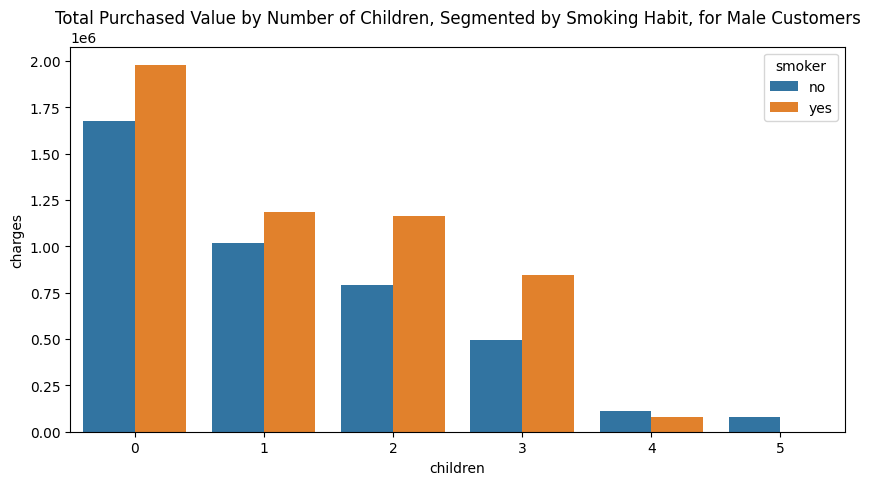

In [25]:
plt.figure(figsize=(10, 5)) 
sns.barplot(male_smoke_children,
            x="children",
            y="charges",
            hue="smoker")

plt.title("Total Purchased Value by Number of Children, Segmented by Smoking Habit, for Male Customers")

plt.show()

Insurance premiums decrease as the number of children increases.

Male smokers with fewer children pay more insurance premiums.

**Lets look at same diagram for female clients:**

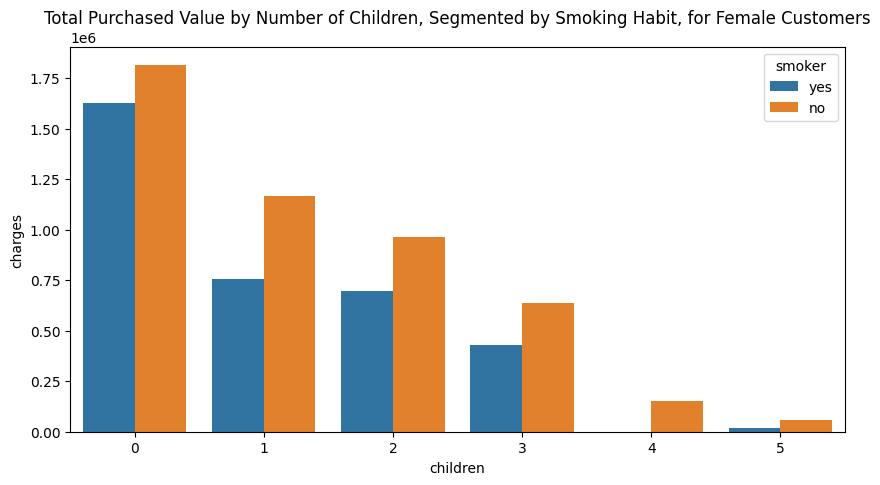

In [26]:
female_smoke_children = female_data.groupby(by=["smoker", "children"], as_index=False).agg({"charges":"sum"}).sort_values(by=["children", "charges"], ascending=True)


plt.figure(figsize=(10, 5)) 
sns.barplot(female_smoke_children,
            x="children",
            y="charges",
            hue="smoker")



plt.title("Total Purchased Value by Number of Children, Segmented by Smoking Habit, for Female Customers")

plt.show()

Similar to males, there seems to be a pattern among females where those with fewer children tend to pay lower insurance premiums, especially if they are smokers.

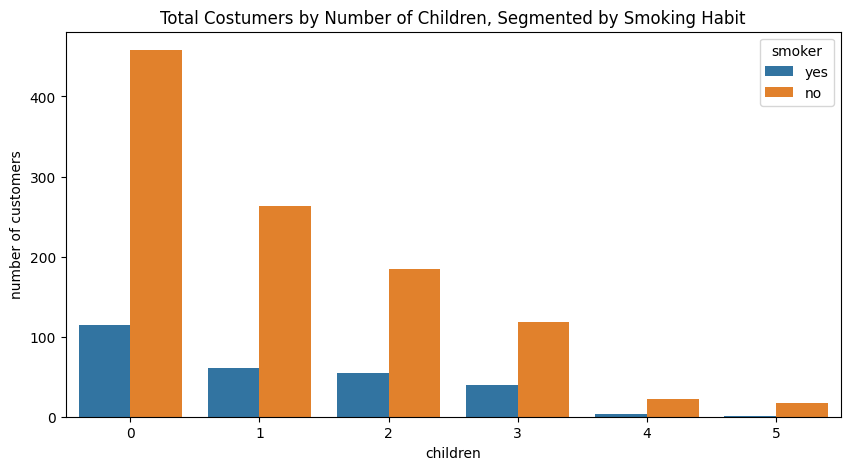

In [27]:
smoker_nonsomker_number = data.groupby(by=["smoker", "children"], as_index=False).agg({"charges":"count"}).sort_values(by=["children", "charges"], ascending=True)
smoker_nonsomker_number.rename(columns={"charges":"number of customers"}, inplace=True)


plt.figure(figsize=(10, 5)) 
sns.barplot(smoker_nonsomker_number,
            x="children",
            y="number of customers",
            hue="smoker")

plt.title("Total Costumers by Number of Children, Segmented by Smoking Habit")

plt.show()

Number of non-smoker costumers is way more then smoker people

------------

# Smokers Age

lets look at number of smokers people in each age group

In [28]:
smoker_age = data.loc[data["smoker"] == "yes"]
smoker_age = data.groupby(by="age_range", as_index=False).agg({"smoker":"count"})
smoker_age_top10 = smoker_age.sort_values(by="smoker", ascending=False)
smoker_age


C:\Users\saeed\AppData\Local\Temp\ipykernel_6472\795882110.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,age_range,smoker
0,18-30,416
1,31-40,257
2,41-50,279
3,51-60,271
4,61-70,114
5,71-80,0
6,81-90,0


In [29]:
fig = px.pie(smoker_age_top10, names='age_range', values='smoker', title='Smokers Age')
fig.show()


31% of smokers are between 18 and 30

most of smokers are at early ages 

 let's refine our analysis by excluding clients at early ages and re-evaluating the relationship between insurance premiums and the number of children for smokers.

Upon excluding clients at early ages, it remains evident that both male and female smokers with fewer children tend to pay lower insurance premiums, indicating a correlation between the number of children and insurance costs for this demographic.

In [30]:
old_client = data.loc[data["age"] > 22]
old_client.head(3)

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_condition
2,28,male,33.000,3,no,southeast,4449.46200,18-30,over_weight
3,33,male,22.705,0,no,northwest,21984.47061,31-40,healthy
4,32,male,28.880,0,no,northwest,3866.85520,31-40,over_weight


<Axes: xlabel='children', ylabel='charges'>

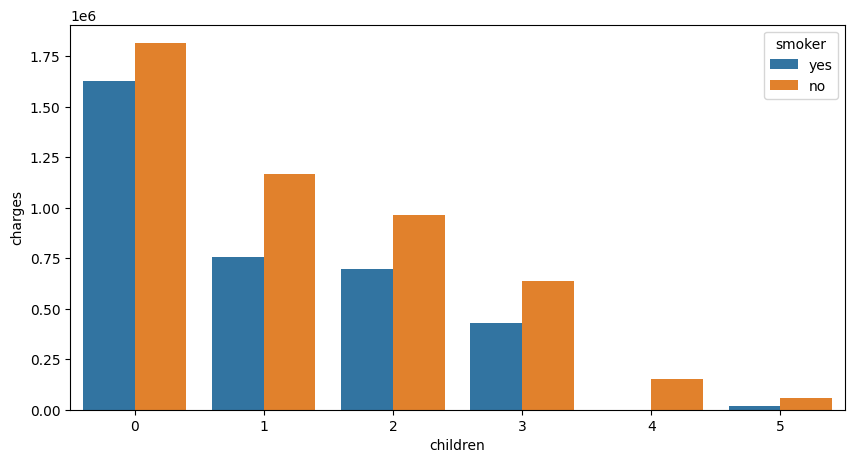

In [31]:
old_client.groupby(by=["smoker", "children"], as_index=False).agg({"charges":"sum"}).sort_values(by=["children", "charges"], ascending=True)

plt.figure(figsize=(10, 5)) 
sns.barplot(female_smoke_children,
            x="children",
            y="charges",
            hue="smoker")

In [32]:
smookers_age = data.loc[data["smoker"] == "yes"].groupby(by="age_range", as_index=False).agg(number_of_smokers = ("smoker", "count"))
smookers_age


C:\Users\saeed\AppData\Local\Temp\ipykernel_6472\923139602.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,age_range,number_of_smokers
0,18-30,86
1,31-40,58
2,41-50,62
3,51-60,41
4,61-70,27
5,71-80,0
6,81-90,0


In [33]:

fig = px.bar(smookers_age, y='number_of_smokers', x='age_range', text_auto='.2s',
            title="Number of Smoker costumers of each age interval")

plt.figure(figsize=(10, 5)) 
fig.update_xaxes(title_font=dict(size=22))  # Change x-axis label font size for all subplots
fig.update_yaxes(title_font=dict(size=22))  # Change y-axis label font size for all subplots

fig.update_layout(
    title_font=dict(size=24),  )
fig.show()

<Figure size 1000x500 with 0 Axes>

most of our smoker customers are at early ages and by removing them from data frame still we see non smoker persons in total ate paying more for their insurance

----------------------------------------------------

# Region

lets look at charges value and location:

[Text(0.5, 0, 'Location'), Text(0, 0.5, 'Total Value of Charges')]

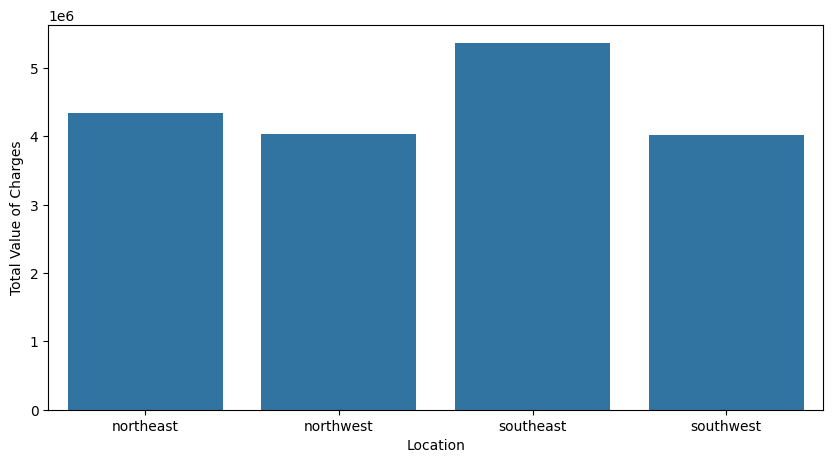

In [34]:
region_charges = data.groupby(by="region", as_index=False).agg({"charges":"sum"})
plt.figure(figsize=(10, 5)) 
ax = sns.barplot(region_charges,
            x="region",
            y="charges")



ax.set(xlabel='Location', ylabel='Total Value of Charges')


total value of charges at southeast region is bigger than other regions

--------------

# Region Vs BMI

In [35]:
region_bmi = data.groupby(by=["region", "bmi_condition"], as_index=False).agg({"bmi":"count"})
region_bmi = region_bmi.rename(columns={"bmi":"Total_costumers"}) 
region_bmi
# create a bar plot for region bmi_condition bmi count (seprated bar plot)

,region,bmi_condition,Total_costumers
0,northeast,healthy,72
1,northeast,over_weight,242
2,northeast,under_weight,10
3,northwest,healthy,62
4,northwest,over_weight,255
5,northwest,under_weight,7
6,southeast,healthy,40
7,southeast,over_weight,324
8,southwest,healthy,48
9,southwest,over_weight,274


## Total Number of Customers per bmi and region

In [36]:
plt.figure(figsize=(12, 12)) 
fig = px.bar(region_bmi, x="region", y="Total_costumers", color="bmi_condition", barmode="group", title="Total customer per region and bmi_condition")
fig.update_xaxes(title_font=dict(size=22))  # Change x-axis label font size for all subplots
fig.update_yaxes(title_font=dict(size=22))  # Change y-axis label font size for all subplots

fig.update_xaxes(title_font=dict(size=22))  # Change x-axis label font size for all subplots
fig.update_yaxes(title_font=dict(size=22))  # Change y-axis label font size for all subplots

fig.update_layout(
    title_font=dict(size=24),  )
fig.show()


c:\Users\saeed\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Figure size 1200x1200 with 0 Axes>

--------------------

## Total Value purchase per bmi and region

Let's examine the distribution of clients across different BMI categories and analyze the total charges associated with each category.

In [37]:
bmi_total_clients_charges = data.groupby(by=["region", "bmi_condition"], as_index=False).agg({"age":"count" ,"charges":"sum"})
bmi_total_clients_charges.columns = ["region", "bmi_condition", "customers", "sum_charges"]
bmi_total_clients_charges

,region,bmi_condition,customers,sum_charges
0,northeast,healthy,72,8.029283e+05
1,northeast,over_weight,242,3.451596e+06
2,northeast,under_weight,10,8.914424e+04
3,northwest,healthy,62,6.220154e+05
4,northwest,over_weight,255,3.347494e+06
5,northwest,under_weight,7,6.456346e+04
6,southeast,healthy,40,5.314723e+05
7,southeast,over_weight,324,4.832217e+06
8,southwest,healthy,48,3.478329e+05
9,southwest,over_weight,274,3.641585e+06


In [38]:
plt.figure(figsize=(12, 12)) 
fig = px.bar(bmi_total_clients_charges, x="region", y="sum_charges", color="bmi_condition", barmode="group", title="Total purchase per region and bmi condition")
fig.update_xaxes(title_font=dict(size=22))  # Change x-axis label font size for all subplots
fig.update_yaxes(title_font=dict(size=22))  # Change y-axis label font size for all subplots

fig.update_xaxes(title_font=dict(size=22))  # Change x-axis label font size for all subplots
fig.update_yaxes(title_font=dict(size=22))  # Change y-axis label font size for all subplots

fig.update_layout(
    title_font=dict(size=24),  )
fig.show()

c:\Users\saeed\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Figure size 1200x1200 with 0 Axes>

The majority of our clientele are overweight, and a significant portion of the charges incurred can be attributed to this BMI category.

-------------------------------

# Identifying the Most Valuable Age Group Within a Segment

as we saw previously overweighed smoker men with zero children are main resource of company revenue. ii want to find which age range of this segment is paying more on average for insurance

In [43]:
condition = (data["sex"] == "male") & (data["bmi_condition"] == "over_weight") & (data["children"] == 0) & (data["smoker"] == "yes")
smoker_overweighed_male_no_children = data.loc[condition]
smoker_overweighed_male_no_children.head(3)

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_condition
14,27,male,42.13,0,yes,southeast,39611.7577,18-30,over_weight
19,30,male,35.30,0,yes,southwest,36837.4670,31-40,over_weight
30,22,male,35.60,0,yes,southwest,35585.5760,18-30,over_weight


## group this segment by age interval

In [56]:
first_group_average_payment = smoker_overweighed_male_no_children.groupby(by="age_range", observed=False, as_index=False).agg(average_payment=("charges", "mean"), total_clients = ("age", "count") )
first_group_average_payment.sort_values(ascending=False, by="average_payment")

,age_range,average_payment,total_clients
4,61-70,45474.148974,8
2,41-50,40794.064878,5
3,51-60,37031.419200,6
1,31-40,31086.938533,6
0,18-30,29834.676890,26
5,71-80,NaN,0
6,81-90,NaN,0


# Conclusion

In summary, this dataset contains a wealth of valuable information, and our analysis has uncovered several key insights:

1. The majority of the company's revenue comes from male clients.
2. Non-smokers and individuals with fewer children tend to pay higher premiums for insurance services, and the majority of customers in our dataset are non-smokers.
3. Overweight individuals constitute a significant portion of our customer base and contribute substantially to the purchased value of insurance services.
4. Implementing Key Performance Indicators (KPIs) to track the value added by each customer is recommended, as there is an imbalance between the number of customers and the value of purchases made by them.
5. This dataset can be utilized to develop a user-friendly platform that provides insights into the best and most cost-effective insurance options, facilitating informed decision-making for health insurance.

Moving forward, our primary focus will be conducting a detailed **`competitor analysis`** in a separate notebook.